# Book Recommendation 

### Import liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [2]:
df_books = pd.read_csv(r'C:\Users\sanket\Desktop\Book Recommendation\Books.csv',encoding='latin-1')
df_ratings = pd.read_csv(r'C:\Users\sanket\Desktop\Book Recommendation\Ratings.csv',encoding='latin-1')
df_users = pd.read_csv(r'C:\Users\sanket\Desktop\Book Recommendation\Users.csv',encoding='latin-1')

In [3]:
df_books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
df_users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
df_ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


## Exploratory Data Analysis(EDA)

In [ ]:
# drop unnecessary columns

In [6]:
df_books = df_books.drop(['ISBN','Year-Of-Publication','Publisher','Image-URL-S','Image-URL-L','Image-URL-M'],axis=1)

In [7]:
df_books

,Book-Title,Book-Author
0,Classical Mythology,Mark P. O. Morford
1,Clara Callan,Richard Bruce Wright
2,Decision in Normandy,Carlo D'Este
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,The Mummies of Urumchi,E. J. W. Barber
...,...,...
271355,There's a Bat in Bunk Five,Paula Danziger
271356,From One to One Hundred,Teri Sloat
271357,Lily Dale : The True Story of the Town that Ta...,Christine Wicker
271358,Republic (World's Classics),Plato


In [8]:
df_books.isna().sum()

Book-Title     0
Book-Author    2
dtype: int64

In [ ]:
# checking unique books

In [9]:
df_books['Book-Title'].nunique()

242131

In [10]:
df_books.value_counts()

Book-Title                        Book-Author          
Little Women                      Louisa May Alcott        21
Adventures of Huckleberry Finn    Mark Twain               20
Wuthering Heights                 Emily Bronte             20
Pride and Prejudice               Jane Austen              18
Great Expectations                Charles Dickens          16
                                                           ..
Heritage of Hastur                Marion Zimmer Bradley     1
Heritage of Music (4 Volume Set)  Michael Raeburn           1
Heritage of Shame                 Meg Hutchinson            1
Heritage of Stars                 Clifford D. Simak         1
Ã?Â?thique en toc                 Didier Daeninckx          1
Name: count, Length: 251182, dtype: int64

In [ ]:
# check duplicates

In [11]:
df_books.duplicated().sum()

20176

In [ ]:
# Remove Duplicates

In [12]:
df_books = df_books.drop_duplicates()

In [13]:
df_books.duplicated().sum()

0

In [14]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251184 entries, 0 to 271359
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Book-Title   251184 non-null  object
 1   Book-Author  251182 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB


In [15]:
df_books.describe()

,Book-Title,Book-Author
count,251184,251182
unique,242131,102022
top,Selected Poems,William Shakespeare
freq,25,496


In [ ]:
#users

In [16]:
df_users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [17]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [18]:
df_users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [19]:
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
# ratings

In [20]:
df_ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [21]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book-Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [22]:
df_ratings.describe()

,User-ID,Book-Rating
count,1.048575e+06,1.048575e+06
mean,1.285089e+05,2.879907e+00
std,7.421876e+04,3.857870e+00
min,2.000000e+00,0.000000e+00
25%,6.339400e+04,0.000000e+00
50%,1.288350e+05,0.000000e+00
75%,1.927790e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [23]:
df_users['User-ID']

0              1
1              2
2              3
3              4
4              5
           ...  
278853    278854
278854    278855
278855    278856
278856    278857
278857    278858
Name: User-ID, Length: 278858, dtype: int64

In [ ]:
# Data Merging ( combine columns into single Dataframe)

In [24]:
df = pd.DataFrame()

In [25]:
df['User-ID'] = df_users['User-ID']
df['books'] = df_books['Book-Title']
df['authors'] = df_books['Book-Author']
df['ratings'] = df_ratings['Book-Rating']
df['ISBN'] = df_ratings['ISBN']

In [26]:
df

,User-ID,books,authors,ratings,ISBN
0,1,Classical Mythology,Mark P. O. Morford,0,034545104X
1,2,Clara Callan,Richard Bruce Wright,5,155061224
2,3,Decision in Normandy,Carlo D'Este,0,446520802
3,4,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,3,052165615X
4,5,The Mummies of Urumchi,E. J. W. Barber,6,521795028
...,...,...,...,...,...
278853,278854,NaN,NaN,0,517476711
278854,278855,NaN,NaN,0,671003755
278855,278856,NaN,NaN,0,671009532
278856,278857,NaN,NaN,0,671510053


In [ ]:
# check null values

In [27]:
df.isnull().sum()

User-ID        0
books      27674
authors    27676
ratings        0
ISBN           0
dtype: int64

In [ ]:
# remove null values

In [28]:
df = df.dropna()

In [29]:
df.isnull().sum()

User-ID    0
books      0
authors    0
ratings    0
ISBN       0
dtype: int64

In [30]:
df

,User-ID,books,authors,ratings,ISBN
0,1,Classical Mythology,Mark P. O. Morford,0,034545104X
1,2,Clara Callan,Richard Bruce Wright,5,155061224
2,3,Decision in Normandy,Carlo D'Este,0,446520802
3,4,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,3,052165615X
4,5,The Mummies of Urumchi,E. J. W. Barber,6,521795028
...,...,...,...,...,...
271354,271355,Flashpoints: Promise and Peril in a New World,Robin Wright,8,370040073X
271356,271357,From One to One Hundred,Teri Sloat,0,376410127X
271357,271358,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,0,3764101539
271358,271359,Republic (World's Classics),Plato,0,3774210691


## Data Visualization

### 1) Visualize top 10 most popular books

In [25]:
val= df['books'].value_counts().values
val

array([25, 12, 12, ...,  1,  1,  1], dtype=int64)

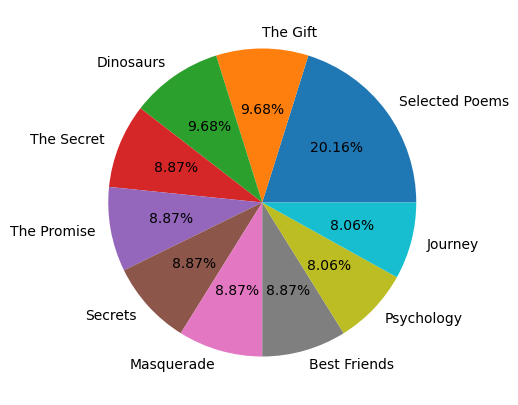

In [32]:
plt.figure(figsize=(20,5))
plt.pie(val[:10],labels=df['books'].value_counts().index[:10],autopct='%1.2f%%')
plt.show()

### 2) Visualize the distribution of ratings

<Axes: xlabel='ratings'>

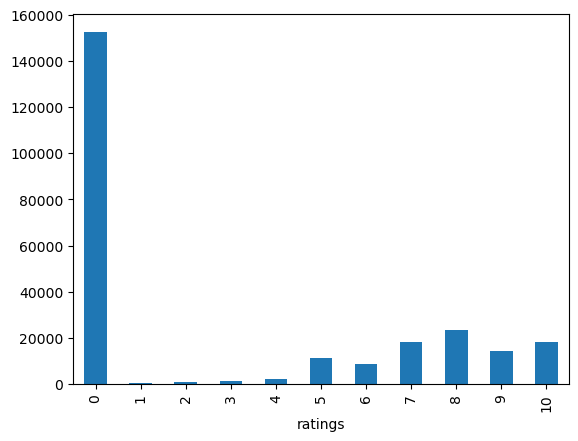

In [33]:
df['ratings'].value_counts().sort_index().plot(kind='bar')

### 3) Compare the average rating for top authors.

<Axes: title={'center': 'Top Authors by Average Rating'}, xlabel='authors'>

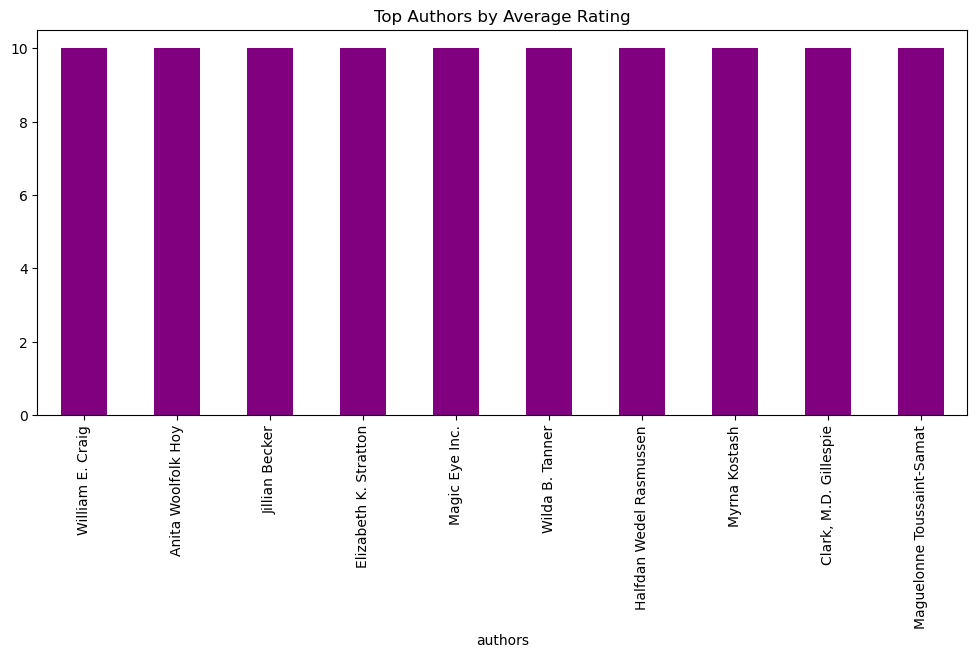

In [34]:
top_authors_ratings = df.groupby('authors')['ratings'].mean().sort_values(ascending=False).head(10)
top_authors_ratings.plot(kind='bar', figsize=(12, 5), color='purple', title='Top Authors by Average Rating')

### 4) Top 10 Books with the Most Ratings

<Axes: title={'center': 'Top 10 Most Rated Books'}, ylabel='books'>

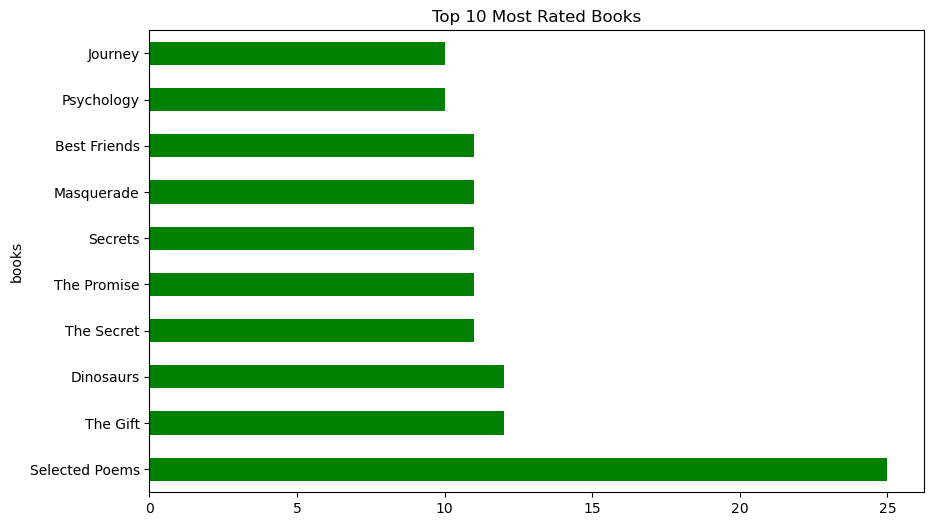

In [35]:
most_rated_books = df['books'].value_counts().head(10)
most_rated_books.plot(kind='barh', figsize=(10, 6), color='green', title='Top 10 Most Rated Books')

In [ ]:
# Remove entries with zero ratings

In [31]:
df_rating_0=df[df['ratings']==0]
df_rating_0

,User-ID,books,authors,ratings,ISBN
0,1,Classical Mythology,Mark P. O. Morford,0,034545104X
2,3,Decision in Normandy,Carlo D'Este,0,446520802
5,6,The Kitchen God's Wife,Amy Tan,0,2080674722
10,11,Nights Below Station Street,David Adams Richards,0,425115801
11,12,Hitler's Secret Bankers: The Myth of Swiss Neu...,Adam Lebor,0,449006522
...,...,...,...,...,...
271350,271351,"Burpee Gardening Cyclopedia: A Concise, Up to ...",Allan Armitage,0,3614470016
271356,271357,From One to One Hundred,Teri Sloat,0,376410127X
271357,271358,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,0,3764101539
271358,271359,Republic (World's Classics),Plato,0,3774210691


In [32]:
df = df[df['ratings']!=0]
df

,User-ID,books,authors,ratings,ISBN
1,2,Clara Callan,Richard Bruce Wright,5,155061224
3,4,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,3,052165615X
4,5,The Mummies of Urumchi,E. J. W. Barber,6,521795028
6,7,What If?: The World's Foremost Military Histor...,Robert Cowley,8,3257224281
7,8,PLEADING GUILTY,Scott Turow,6,600570967
...,...,...,...,...,...
271342,271343,Core Web Programming (2nd Edition),Marty Hall,8,3570046583
271351,271352,Tropical Rainforests: 230 Species in Full Colo...,"Allen M., Ph.D. Young",7,3625204037
271352,271353,Cocktail Classics,David Biggs,7,3625204061
271353,271354,Anti Death League,Kingsley Amis,7,3625204096


In [33]:
df['ratings']

1         5
3         3
4         6
6         8
7         6
         ..
271342    8
271351    7
271352    7
271353    7
271354    8
Name: ratings, Length: 98564, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98564 entries, 1 to 271354
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User-ID  98564 non-null  int64 
 1   books    98564 non-null  object
 2   authors  98564 non-null  object
 3   ratings  98564 non-null  int64 
 4   ISBN     98564 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.5+ MB


In [35]:
df.describe()

,User-ID,ratings
count,98564.000000,98564.000000
mean,130427.488170,7.581074
std,78789.956741,1.863604
min,2.000000,1.000000
25%,58338.750000,7.000000
50%,125009.500000,8.000000
75%,200550.500000,9.000000
max,271355.000000,10.000000


In [36]:
df.shape

(98564, 5)

### Data Splitting

In [47]:
98564/4

24641.0

In [ ]:
# Split the data

In [37]:
df1= df.iloc[:10000]
df2 = df.iloc[10000:20000]
df3  = df.iloc[20000:]
print(df1.shape,df2.shape,df3.shape)

(10000, 5) (10000, 5) (78564, 5)


In [38]:
df1.head()

,User-ID,books,authors,ratings,ISBN
1,2,Clara Callan,Richard Bruce Wright,5,155061224
3,4,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,3,052165615X
4,5,The Mummies of Urumchi,E. J. W. Barber,6,521795028
6,7,What If?: The World's Foremost Military Histor...,Robert Cowley,8,3257224281
7,8,PLEADING GUILTY,Scott Turow,6,600570967


In [39]:
newdf1 = df1.pivot_table(index='User-ID',columns='books',values='ratings')

In [40]:
newdf1.head()

books,' Small g'. Eine Sommeridylle.,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,".Hack: //Legend of the Twilight, Vol. 1",".Hack: //Legend of the Twilight, Vol. 2",".NET Framework Essentials, 3rd Edition",10 Commandments Of Dating,10 Secrets for Success and Inner Peace,10 critical keys for highly effective Mormon families,"10,000 Things to Praise God for",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),Zuckerman Bound,Zuleika Dobson (Penguin Modern Classics),"\A\"" is for Alibi : A Kinsey Millhone Mystery (A Kinsey Millhone Mystery)""","\I Won't Learn from You\"": And Other Thoughts on Creative Maladjustment""","\More More More,\"" Said the Baby""","\O\"" Is for Outlaw""",eCFO: Sustaining Value in The New Corporation,iI Paradiso Degli Orchi,Ã?Â?ber die Freiheit.
User-ID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
newdf1.fillna(0, inplace=True)

In [42]:
newdf1.head()

books,' Small g'. Eine Sommeridylle.,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,".Hack: //Legend of the Twilight, Vol. 1",".Hack: //Legend of the Twilight, Vol. 2",".NET Framework Essentials, 3rd Edition",10 Commandments Of Dating,10 Secrets for Success and Inner Peace,10 critical keys for highly effective Mormon families,"10,000 Things to Praise God for",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),Zuckerman Bound,Zuleika Dobson (Penguin Modern Classics),"\A\"" is for Alibi : A Kinsey Millhone Mystery (A Kinsey Millhone Mystery)""","\I Won't Learn from You\"": And Other Thoughts on Creative Maladjustment""","\More More More,\"" Said the Baby""","\O\"" Is for Outlaw""",eCFO: Sustaining Value in The New Corporation,iI Paradiso Degli Orchi,Ã?Â?ber die Freiheit.
User-ID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Calculating Cosine Similarity between Users

In [43]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [44]:
user_sim1 = 1 - pairwise_distances(newdf1.values,metric='cosine')
user_sim1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [45]:
user_sim1.shape

(10000, 10000)

In [46]:
type(user_sim1)

numpy.ndarray

In [47]:
df_user_sim1 = pd.DataFrame(user_sim1)
df_user_sim1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
df_user_sim1.index = df1['User-ID']
df_user_sim1.columns = df1['User-ID']
df_user_sim1

User-ID,2,4,5,7,8,9,10,17,20,21,...,25940,25942,25949,25953,25955,25956,25960,25962,25966,25974
User-ID,,,,,,,,,,,,,,,,,,,,,
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
np.fill_diagonal(user_sim1, 0)
df_user_sim1.iloc[0:15, 0:15]

User-ID,2,4,5,7,8,9,10,17,20,21,22,24,25,28,29
User-ID,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Find out similar users

In [50]:
df_user_sim1.idxmax(axis=1)[0:50]

User-ID
2      2
4      2
5      2
7      2
8      2
9      2
10     2
17     2
20     2
21     2
22     2
24     2
25     2
28     2
29     2
30     2
31     2
34     2
45     2
50     2
56     2
58     2
60     2
62     2
63     2
67     2
70     2
71     2
72     2
78     2
80     2
82     2
84     2
85     2
86     2
87     2
89     2
91     2
98     2
106    2
110    2
113    2
114    2
115    2
119    2
121    2
122    2
123    2
124    2
125    2
dtype: int64

In [51]:
df[(df['User-ID']==115) | (df['User-ID']==46870)]

,User-ID,books,authors,ratings,ISBN
114,115,The Beach House,James Patterson,8,8879839993
46869,46870,The Beach House,Georgia Bockoven,8,312130228


In [52]:
df[df['authors']=='James Patterson']

,User-ID,books,authors,ratings,ISBN
114,115,The Beach House,James Patterson,8,8879839993
677,678,Along Came a Spider (Alex Cross Novels),James Patterson,6,680ISBN359623
786,787,Suzanne's Diary for Nicholas,James Patterson,10,425182150
788,789,2nd Chance,James Patterson,8,61007129
1862,1863,Cradle and All,James Patterson,10,849995892
9626,9627,Black Market,James Patterson,10,156047624
9754,9755,See How They Run,James Patterson,7,15019/87
19423,19424,The Thomas Berryman Number,James Patterson,8,515097039
23631,23632,Jack and Jill: A Novel,James Patterson,3,821767240
27106,27107,Jack &amp; Jill,James Patterson,8,2070374874


In [53]:
df_user_sim1.idxmax(axis=1)[50:100]

User-ID
126       2
128       2
129       2
130       2
133       2
134       2
135       2
136       2
137       2
138       2
139       2
141       2
142       2
143       2
144       2
145       2
146       2
147       2
148       2
149       2
150       2
159       2
164       2
166       2
168       2
169       2
173       2
175       2
177       2
178       2
179       2
180    2231
183       2
185       2
186       2
187       2
188       2
189       2
190       2
191       2
193       2
194       2
195       2
196       2
197       2
200       2
201       2
203       2
204       2
208       2
dtype: int64

In [54]:
df[(df['User-ID']==180)| (df['User-ID']==2231)]

,User-ID,books,authors,ratings,ISBN
179,180,Fahrenheit 451,Ray Bradbury,10,3423071516
2230,2231,Fahrenheit 451,RAY BRADBURY,10,553148001


In [55]:
df[df['authors']=='Ray Bradbury']

,User-ID,books,authors,ratings,ISBN
177,178,Der illustrierte Mann. ErzÃ?Â¤hlungen.,Ray Bradbury,8,3404148576
179,180,Fahrenheit 451,Ray Bradbury,10,3423071516
182,183,LÃ?Â¶wenzahnwein. Roman.,Ray Bradbury,8,3426029553
184,185,Die Mechanismen der Freude. ErzÃ?Â¤hlungen.,Ray Bradbury,8,3426671298
185,186,Familientreffen. ErzÃ?Â¤hlungen.,Ray Bradbury,9,344215121X
186,187,Der Tod kommt schnell in Mexico. ErzÃ?Â¤hlungen.,Ray Bradbury,10,3442413508
731,732,Chroniques martiennes,Ray Bradbury,9,590456504
1461,1462,Fahrenheit 451 / Fahrenheit 451,Ray Bradbury,10,60006641
9183,9184,Zen in the Art of Writing,Ray Bradbury,8,767902890
12969,12970,Cronicas Marcianas,Ray Bradbury,10,913367176


# Model Evaluation

In [ ]:
#  Split Data for Training and Testing

In [56]:
train_data = df1
test_data = df2

In [57]:
test_matrix = test_data.pivot_table(index='User-ID', columns='books', values='ratings').fillna(0)

In [58]:
test_matrix.head()

books,Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),#NAME?,"1, 2, 3: NURSERY BOARD BOOKS (Nursery Board Books)","1,000 Places to See Before You Die","1,001 Ideas for Science Projects","1,001 Things to Do When There's Nothing to Do",10 Bad Choices That Ruin Black Women's Lives,10 Keys for Unlocking the Bible: Treasures That Will Change Your Life,10 Minutes Till Bedtime,100 Weekend Cross-Stitch Gifts,...,"\The Times\"" Tournament of the Mind""","\What Do You Care What Other People Think?\"": Further Adventures of a Curious Character""","aol.com: How Steve Case Beat Bill Gates, Nailed the Netheads, and Made Millions in the War for the Web","buongiorno!, Tl.1, Lehrbuch, Italienisch fÃ?Â¼r AnfÃ?Â¤nger",christmas on snowbird mountain,de Amor y de Sombra - Bolsillo,eXistenZ: A Novelization,seaQuest 2,why I'm like this : True Stories,Ã?Â?thique en toc
User-ID,,,,,,,,,,,,,,,,,,,,,
25979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
newdf1.values.shape

(10000, 9937)

In [60]:
user_sim1.shape

(10000, 10000)

In [ ]:
# Creating a Prediction Function

In [ ]:
# function that predicts ratings for users based on the similarity matrix:-

In [61]:
def predict_ratings(similarity_matrix, ratings_matrix):
    mean_user_rating = ratings_matrix.mean(axis=1)
    ratings_diff = ratings_matrix - mean_user_rating[:, np.newaxis]
    pred = mean_user_rating[:, np.newaxis] + similarity_matrix.dot(ratings_diff) / np.array([np.abs(similarity_matrix).sum(axis=1)]).T
    return pred

In [62]:
predicted_ratings = predict_ratings(user_sim1, newdf1.values)

In [63]:
predicted_ratings

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Convert predictions and test data into flat arrays

In [65]:
actual_ratings = test_matrix.values.flatten()
pred_ratings_flattened = predicted_ratings[:test_matrix.shape[0], :test_matrix.shape[1]].flatten()

In [66]:
actual_ratings

array([0., 0., 0., ..., 0., 0., 0.])

In [67]:
pred_ratings_flattened

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
# Ensure both arrays have the same shape before filtering

In [68]:
if actual_ratings.size != pred_ratings_flattened.size:
    min_size = min(actual_ratings.size, pred_ratings_flattened.size)
    actual_ratings = actual_ratings[:min_size]
    pred_ratings_flattened = pred_ratings_flattened[:min_size]

In [ ]:
# Apply mask to filter out zeros in the actual ratings 

In [69]:
mask = actual_ratings != 0
actual_ratings_filtered = actual_ratings[mask]
pred_ratings_filtered = pred_ratings_flattened[mask]

In [70]:
print("actual_ratings shape:", actual_ratings.shape)
print("pred_ratings_flattened shape:", pred_ratings_flattened.shape)
print("mask shape:", mask.shape)

actual_ratings shape: (99370000,)
pred_ratings_flattened shape: (99370000,)
mask shape: (99370000,)


In [71]:
actual_ratings_filtered

array([ 7., 10.,  8., ..., 10., 10.,  9.])

In [72]:
pred_ratings_filtered

array([nan, nan, nan, ..., nan, nan, nan])

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Check if NaN values exist

In [74]:
print(f'NaN in actual ratings: {np.isnan(actual_ratings_filtered).sum()}')
print(f'NaN in predicted ratings: {np.isnan(pred_ratings_filtered).sum()}')

NaN in actual ratings: 0
NaN in predicted ratings: 9856


In [ ]:
# Remove NaN values from both arrays

In [75]:
valid_mask = ~np.isnan(actual_ratings_filtered) & ~np.isnan(pred_ratings_filtered)
actual_ratings_filtered = actual_ratings_filtered[valid_mask]
pred_ratings_filtered = pred_ratings_filtered[valid_mask]

In [76]:
actual_ratings_filtered

array([ 8.,  5.,  8., 10.,  7., 10., 10.,  6.,  6.,  9.,  5.,  6.,  6.,
        9., 10.,  6., 10.,  8.,  6.,  1.,  6.,  7., 10.,  8.,  8.,  8.,
        9.,  2.,  6.,  3.,  5.,  5.,  8., 10.,  8.,  9., 10.,  8.,  8.,
        8.,  8.,  8.,  9.,  8.,  9.,  7.,  6.,  3.,  8.,  7.,  9., 10.,
       10.,  7., 10.,  9.,  8.,  9.,  8.,  5.,  7.,  5.,  8.,  9.,  8.,
       10., 10.,  8.,  6.,  8., 10., 10., 10., 10.,  4.,  8.,  8.,  7.,
       10.,  7.,  8.,  5., 10.,  5., 10.,  8.,  6.,  6.,  7.,  7.,  6.,
        9.,  5.,  7.,  8.,  4.,  5.,  7.,  9.,  8.,  8.,  9.,  7.,  7.,
       10.,  6.,  7.,  8., 10.,  8.,  7.,  6.,  5.,  7.,  5.,  9., 10.,
        8.,  8.])

In [77]:
pred_ratings_filtered

array([ 0.        ,  0.00010063,  0.00010063,  0.00010063,  0.        ,
       -0.00050317, -0.00050317,  0.        , -0.0006038 ,  0.00010063,
       -0.00020127, -0.00040254,  0.00020127,  0.00020127, -0.00010063,
       -0.00010063, -0.00010063,  0.00020127, -0.00010063,  0.        ,
        0.00010063,  0.00010063, -0.0006038 ,  0.0003019 ,  0.0003019 ,
       -0.0003019 , -0.0003019 , -0.00010063,  0.00010063,  0.00010063,
        0.00020127,  0.00020127, -0.0006038 , -0.0006038 ,  0.00020127,
        0.        ,  0.00010063,  0.0006038 , -0.00020127, -0.0003019 ,
       -0.00020127,  0.00040254, -0.00020127, -0.00020127, -0.00010063,
        0.00020127,  0.00020127,  0.        ,  0.00010063,  0.00010063,
       -0.00020127, -0.00020127, -0.00010063,  0.00020127, -0.00020127,
       -0.00010063, -0.00020127, -0.00020127, -0.00040254, -0.00020127,
        0.0006038 ,  0.        , -0.0003019 ,  0.00010063, -0.00010063,
       -0.0006038 ,  0.00010063, -0.00010063, -0.00010063, -0.00

In [ ]:
# Calculate MAE & RMSE

In [78]:
mae = mean_absolute_error(actual_ratings_filtered, pred_ratings_filtered)
mae

7.546255696602884

In [79]:
rmse = np.sqrt(mean_squared_error(actual_ratings_filtered, pred_ratings_filtered))
rmse

7.783892856182475

In [80]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 7.546255696602884
Root Mean Squared Error (RMSE): 7.783892856182475


In [ ]:
# For evaluating top-N recommendations:

In [81]:
def precision_at_k(recommended_items, relevant_items, k):
    recommended_k = recommended_items[:k]
    return len(set(recommended_k) & set(relevant_items)) / k

def recall_at_k(recommended_items, relevant_items, k):
    return len(set(recommended_items[:k]) & set(relevant_items)) / len(relevant_items)

### 1. Distribution of Predicted vs Actual Ratings

In [ ]:
# Visualize how predicted ratings align with actual ratings.

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Plot distribution of actual and predicted ratings

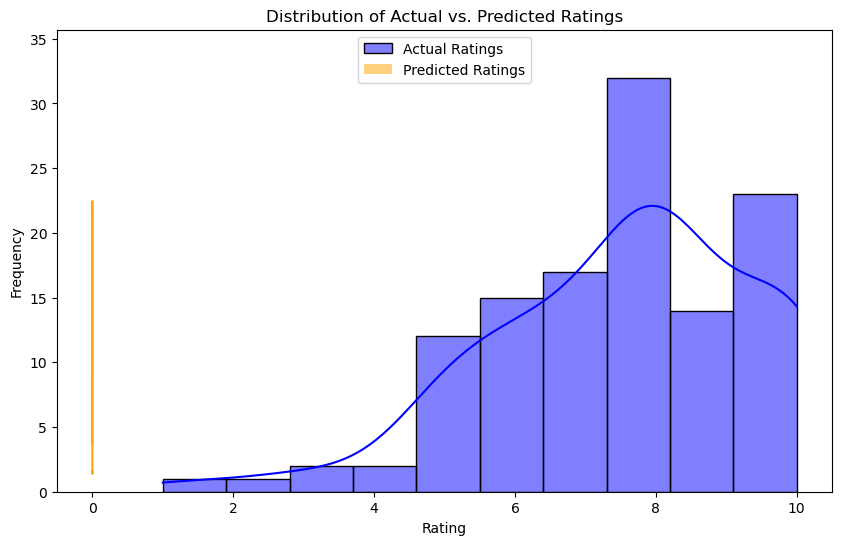

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(actual_ratings_filtered, bins=10, color='blue', kde=True, label='Actual Ratings')
sns.histplot(pred_ratings_filtered, bins=10, color='orange', kde=True, label='Predicted Ratings')
plt.title('Distribution of Actual vs. Predicted Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 2. Error Distribution (Residuals)

In [ ]:
# Check how errors are distributed to identify biases or inconsistencies in predictions.

In [ ]:
# Compute residuals

In [74]:
residuals = actual_ratings_filtered - pred_ratings_filtered

In [ ]:
# Plot residual distribution

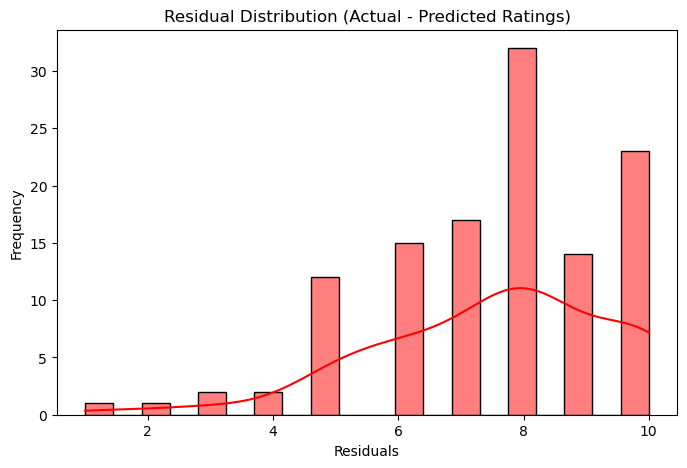

In [75]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color='red')
plt.title('Residual Distribution (Actual - Predicted Ratings)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Prepare the Model for Deployment

In [83]:
import pickle

In [84]:
with open('user_similarity_matrix.pkl', 'wb') as file:
    pickle.dump(user_sim1, file)

In [85]:
with open('user_item_matrix.pkl', 'wb') as file:
    pickle.dump(newdf1, file)